In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [6]:

print(sns.get_dataset_names())




['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [8]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
# finding missing data 
df.isnull()
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
df['adult_male']

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: adult_male, Length: 891, dtype: bool

In [25]:
df[['alive','sex']]

,alive,sex
0,no,male
1,yes,female
2,yes,female
3,yes,female
4,no,male
...,...,...
886,no,male
887,yes,female
888,no,female
889,yes,male


In [31]:
titanic = df[['survived','sex','age','pclass',
              'fare','alone','parch','embark_town']].copy()
titanic



,survived,sex,age,pclass,fare,alone,parch,embark_town
0,0,male,22.0,3,7.2500,False,0,Southampton
1,1,female,38.0,1,71.2833,False,0,Cherbourg
2,1,female,26.0,3,7.9250,True,0,Southampton
3,1,female,35.0,1,53.1000,False,0,Southampton
4,0,male,35.0,3,8.0500,True,0,Southampton
...,...,...,...,...,...,...,...,...
886,0,male,27.0,2,13.0000,True,0,Southampton
887,1,female,19.0,1,30.0000,True,0,Southampton
888,0,female,NaN,3,23.4500,False,2,Southampton
889,1,male,26.0,1,30.0000,True,0,Cherbourg


In [35]:
titanic = df[['survived','sex','age','pclass',
              'fare','alone']].copy()
titanic

,survived,sex,age,pclass,fare,alone
0,0,male,22.0,3,7.2500,False
1,1,female,38.0,1,71.2833,False
2,1,female,26.0,3,7.9250,True
3,1,female,35.0,1,53.1000,False
4,0,male,35.0,3,8.0500,True
...,...,...,...,...,...,...
886,0,male,27.0,2,13.0000,True
887,1,female,19.0,1,30.0000,True
888,0,female,NaN,3,23.4500,False
889,1,male,26.0,1,30.0000,True


In [44]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [39]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:ylabel='sex'>

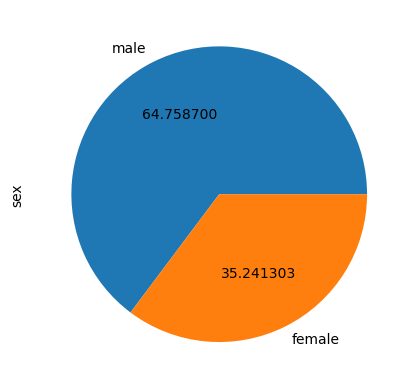

In [71]:
titanic['sex'].value_counts().plot(kind='pie',autopct = '%5f')

<AxesSubplot:ylabel='survived'>

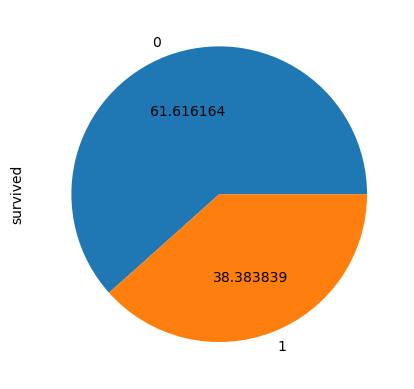

In [82]:
titanic['survived'].value_counts().plot(kind='pie',autopct ='%2f')

In [84]:
#filling the missing data 
#Numerical column - filling with mean(avg is known as mean)
#categorical column = filling with mode(most coommon is called mode)

avg_age = (titanic['age'].mean())
print(avg_age)


29.69911764705882


In [85]:
avg_age = round(titanic['age'].mean())
print(avg_age)

30


In [87]:
avg_fare = round(titanic['fare'].mean())
print(avg_fare)

32


In [88]:
titanic['age'].fillna(avg_age, inplace=True)

In [90]:
most_common_town = titanic['embark_town'].value_counts().idxmax()
print(most_common_town)

KeyError: 'embark_town'